# SCALE.AI Take-Home Challenge
## Submission by Adrian Lievano 

Chicago Bike Sharing:

When trying to determine the effect of a change, we often have to first account for greater sources of variation in the data, by developing a baseline model and using it to control for variables that obscure the underlying pattern.

This exercise involves a public dataset from Kaggle:  https://www.kaggle.com/yingwurenjian/chicago-divvy-bicycle-sharing-data describing rides in a bike share program in Chicago over many years.

Determine the effect of temperature on bike trip counts and lengths, controlling for any relevant seasonality (at the most relevant timescales - use your judgement!) and customer segments. Make your case with the appropriate visualizations.

If you find the amount of data overwhelming, sampling ~100k rows randomly should give you good results.

Structure your efforts into two stages - an exploration stage where you identify the important variables with significant interactions, and a synthesis stage where you pick one or two patterns to organize your findings around.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
df = pd.read_csv('chicago-divvy-bicycle-sharing-data/data.csv')

## Part 1: Determine the effect of temperature on bike trip counts and lengths (control for seasonality), and segments. 
#### Identify the most important variables with significant interactions
#### Synthesis (discussion)


## Step 1: Data Exploration

1. Define objective
2. Determine data types (feature variables)
3. Data Exploration & Visualization
4. Data Preprocessing (if needed)


#### Step 1: Objective

Our goal is to determine the effect of temperature on:

(1) bike trip counts
(2) length, otherwise known as total duration. 

In a typical data science problem, I would first read some background information on cycling patterns and get a better understanding of the domain from where the data comes from. In this take-home challenge, where there is limited time, I will skip this step and focus on answering the problem statement. 

Our intuition says that higher temperatures will lead to decrease trip counts and length. But, we'll see what the data tells us. 


## Step 2: Understand feature variables of the imported dataset

In [3]:
df.columns

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end'],
      dtype='object')

In [4]:
df.shape

(9495235, 23)

In [33]:
sample_size = 100000
df_sample =df.sample(sample_size, replace = False)

In [34]:
df_sample.shape

(100000, 23)

In [35]:
df_sample.describe()

trip_id           year          month           week  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   9.867742e+06    2015.737410       7.171350      29.434490   
std    4.684103e+06       1.075922       2.709491      11.776963   
min    1.110258e+06    2014.000000       1.000000       1.000000   
25%    5.946954e+06    2015.000000       5.000000      22.000000   
50%    1.005100e+07    2016.000000       7.000000      30.000000   
75%    1.384919e+07    2017.000000       9.000000      38.000000   
max    1.753644e+07    2017.000000      12.000000      53.000000   

                 day           hour   tripduration    temperature  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        2.671600      13.626790      11.452488      63.030863   
std         1.891452       4.845394       7.224908      17.134641   
min         0.000000       0.000000       2.000000     -11.900000   
25%         1.000000       9.000000       6.050000      52.000000   
50%         3.000000      15.000000       9.616667      66.900000   
75%         4.000000      17.000000      15.200000      75.900000   
max         6.000000      23.000000      59.800000      95.000000   

       from_station_id  latitude_start  longitude_start  dpcapacity_start  \
count    100000.000000   100000.000000    100000.000000     100000.000000   
mean        180.182850       41.900087       -87.644776         21.410310   
std         121.665157        0.034593         0.021880          7.655491   
min           2.000000       41.743316       -87.802870          0.000000   
25%          77.000000       41.881032       -87.654787         15.000000   
50%         165.000000       41.892278       -87.641066         19.000000   
75%         268.000000       41.919936       -87.629928         23.000000   
max         625.000000       42.064313       -87.551201         55.000000   

       to_station_id   latitude_end  longitude_end  dpcapacity_end  
count  100000.000000  100000.000000  100000.000000   100000.000000  
mean      181.195270      41.900720     -87.645049       21.283380  
std       122.190591       0.034914       0.021921        7.606006  
min         2.000000      41.744053     -87.802870        0.000000  
25%        77.000000      41.881320     -87.655519       15.000000  
50%       166.000000      41.893882     -87.641088       19.000000  
75%       273.000000      41.921687     -87.630585       23.000000  
max       625.000000      42.064313     -87.552812       55.000000

In [36]:
df_sample.head(8)

trip_id  year  month  week  day  hour    usertype  gender  \
4600662   9412570  2016      5    18    2     5  Subscriber  Female   
8031017  16318933  2017      9    36    5    12  Subscriber    Male   
6714710  13278272  2017      2     8    1    17  Subscriber    Male   
6351883  12432028  2016     10    42    3    17  Subscriber    Male   
7885375  16541126  2017      9    38    2    20  Subscriber    Male   
2190041   5113297  2015      5    19    6     9  Subscriber    Male   
1055381   3333769  2014      8    35    3    13  Subscriber    Male   
2845907   6937822  2015      8    33    6    13  Subscriber    Male   

                   starttime             stoptime      ...        \
4600662  2016-05-04 05:12:00  2016-05-04 05:25:00      ...         
8031017  2017-09-09 12:50:38  2017-09-09 12:55:56      ...         
6714710  2017-02-21 17:57:05  2017-02-21 18:23:30      ...         
6351883  2016-10-20 17:55:00  2016-10-20 18:06:32      ...         
7885375  2017-09-20 20:04:22  2017-09-20 20:24:05      ...         
2190041  2015-05-10 09:22:00  2015-05-10 09:28:00      ...         
1055381  2014-08-28 13:09:00  2014-08-28 13:16:00      ...         
2845907  2015-08-16 13:12:00  2015-08-16 13:18:00      ...         

         from_station_id                    from_station_name latitude_start  \
4600662              350            Ashland Ave & Chicago Ave      41.895966   
8031017              111               Sedgwick St & Huron St      41.894666   
6714710              601                     Central St Metra      42.063598   
6351883              211               St. Clair St & Erie St      41.894448   
7885375               81                   Daley Center Plaza      41.884241   
2190041               21           Aberdeen St & Jackson Blvd      41.877726   
1055381              100  Orleans St & Merchandise Mart Plaza      41.888243   
2845907              176                    Clark St & Elm St      41.903233   

         longitude_start dpcapacity_start  to_station_id  \
4600662       -87.667747             15.0            110   
8031017       -87.638437             19.0            359   
6714710       -87.698730             15.0            517   
6351883       -87.622663             19.0            192   
7885375       -87.629634             39.0            153   
2190041       -87.654787             15.0             73   
1055381       -87.636390             23.0             77   
2845907       -87.631253             19.0             85   

                        to_station_name  latitude_end  longitude_end  \
4600662           Dearborn St & Erie St     41.893992     -87.629318   
8031017       Larrabee St & Division St     41.903486     -87.643353   
6714710           Clark St & Jarvis Ave     42.015963     -87.675005   
6351883             Canal St & Adams St     41.879255     -87.639904   
7885375  Southport Ave & Wellington Ave     41.935733     -87.663576   
2190041        Jefferson St & Monroe St     41.880422     -87.642746   
1055381         Clinton St & Madison St     41.881582     -87.641277   
2845907           Michigan Ave & Oak St     41.900960     -87.623777   

        dpcapacity_end  
4600662           23.0  
8031017           23.0  
6714710           15.0  
6351883           47.0  
7885375           19.0  
2190041           19.0  
1055381           23.0  
2845907           23.0  

[8 rows x 23 columns]

In [37]:
df_sample['trip_id'].nunique()

100000

Note: We wanted to make sure there were a unique number of trips. We run the command above to confirm this.

In [38]:
df_sample['usertype'].unique()

array(['Subscriber', 'Customer', 'Dependent'], dtype=object)

Note: This might be a good segment to filter our results on so that we understand the difference between these users. 
usertype"Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership

In [39]:
df_sample['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [40]:
df_sample['events'].unique()

array(['rain or snow', 'cloudy', 'clear', 'tstorms', 'not clear',
       'unknown'], dtype=object)

In [41]:
df_sample.groupby('events')['trip_id'].count().sort_values(ascending = False)

events
cloudy          88592
clear            5288
rain or snow     4548
not clear         897
tstorms           671
unknown             4
Name: trip_id, dtype: int64

Note: This is another categorical variable that will serve to help us better understand how these weather conditions, in addition to temperature, influence total trip count and duration.

(1) 88% of the sample shows weather that is cloudy. 5.3% clear, 4.5% rain/snow, and around 1.6% for other or not clear.

In [97]:
df_sample.groupby('usertype')['trip_id'].count().sort_values(ascending = False)

usertype
Subscriber    99987
Customer         10
Dependent         3
Name: trip_id, dtype: int64

Note: An overwhelming majority of a sample dataset is of subscribers. This won't be a useful filter when we try to understand our temperature versus trip duration given the low representation of the other groups.

df_sample['to_station_name'].unique()

In [42]:
df_sample['dpcapacity_end'].describe()

count    100000.000000
mean         21.283380
std           7.606006
min           0.000000
25%          15.000000
50%          19.000000
75%          23.000000
max          55.000000
Name: dpcapacity_end, dtype: float64

We are going to place less of an emphasis on these feature variables:
    1. 'from_station_id', 
    2. 'from_station_name', 
    3. 'latitude_start',
    4. 'longitude_start', 
    5. 'dpcapacity_start', 
    6. 'to_station_id',
    7. 'to_station_name', 
    8. 'latitude_end', 
    9. 'longitude_end', 
    10. 'dpcapacity_end']

#### Temperature is the Independent Variable of Interest

In [43]:
df_sample['temperature'].describe()

count    100000.000000
mean         63.030863
std          17.134641
min         -11.900000
25%          52.000000
50%          66.900000
75%          75.900000
max          95.000000
Name: temperature, dtype: float64

In aggregate, the average temperature across all time periods, weather conditions, users, etc., is 63 degrees Farenheit. Our hottest day was 95 degrees F. Our coldest day was -9.9 degrees F, someone was biking when it was freezing outside!

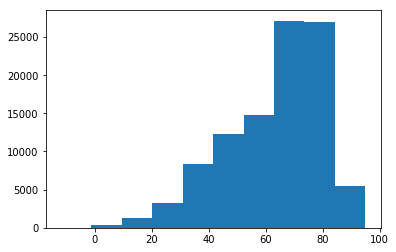

In [44]:
plt.hist(df_sample['temperature'])
plt.show()

#### Trip Duration is one of our dependent variables of interest

In [45]:
df_sample['tripduration'].describe()

count    100000.000000
mean         11.452488
std           7.224908
min           2.000000
25%           6.050000
50%           9.616667
75%          15.200000
max          59.800000
Name: tripduration, dtype: float64

In aggregate, the average trip time across all time periods, weather conditions, users, etc., is 11.4 minutes. Our standard deviation is 7.2 minutes, and our 3rd interquartile range of trips is at 15 minutes. If we wanted to build a prediction algorithm and we wanted to remove outliers, this would be a good upper threshold to consider.

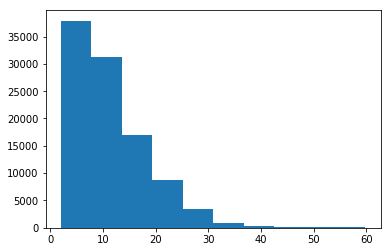

In [46]:
plt.hist(df_sample['tripduration'])
plt.show()

In [47]:
### Visualization - Date vs. Total Duration of Trip w/ Temperature Over Time as Second Axis (grouped by week)

In [48]:
import plotly.express as px

Note: One way to understand the data is to group results by different time variables, so that we don't produce a massive scatter plot

In [90]:
df_sample_gweek = df_sample[['year', 'week','trip_id', 'usertype', 'gender', 'events','temperature', 'tripduration']].groupby(['year','week','usertype','gender','events']).mean().reset_index()

df_sample_gweek.shape

(1358, 8)

Note: This dataframe is getting the mean temperature on a given week per year

In [91]:
df_sample_ghour = df_sample[['year', 'week','hour','trip_id', 'usertype', 'gender', 'events','temperature', 'tripduration']].groupby(['year','week','hour','usertype','gender','events']).mean().reset_index()
df_sample_ghour.shape


(11973, 9)

Note: This dataframe is getting the maximum temperature on a given hour per week per year

### This is an aggregate plot of temperature versus trip duration.

In [92]:
fig = px.scatter(df_sample, x='temperature', y='tripduration')
fig.show()

Note: From initial inspection, aggregate display of temperature versus trip duration tends to show an upward trend to the right. We'll further segment this data to see what we discover.

## Average Hourly Temperature vs. Trip Duration 
### Segmented by Gender

In [108]:
fig = px.scatter(df_sample_ghour, x='temperature', y='tripduration',
                color = 'gender')
fig.show()

Note: The data is still messy and hard to interpret, even after grouping by the average hourly temperature on a given week on a given year. We could fit a linear regression here to determine the slope and y-intercept of the line to match the relationship between temperature and trip duration, but it might not be as valuable given that the spread of this data is still quite high.

In [109]:
df_sample_ghour.describe()

year          week          hour       trip_id   temperature  \
count  11973.000000  11973.000000  11973.000000  1.197300e+04  11973.000000   
mean    2015.568112     28.023052     12.974777  9.028271e+06     54.492576   
std        1.101729     14.422221      6.126686  4.818713e+06     18.608110   
min     2014.000000      1.000000      0.000000  1.110258e+06    -11.900000   
25%     2015.000000     16.000000      8.000000  4.569383e+06     40.466667   
50%     2016.000000     29.000000     13.000000  8.729618e+06     57.300000   
75%     2017.000000     40.000000     18.000000  1.306298e+07     69.750000   
max     2017.000000     53.000000     23.000000  1.753608e+07     91.000000   

       tripduration  
count  11973.000000  
mean      11.091699  
std        4.577987  
min        2.000000  
25%        8.183333  
50%       10.738889  
75%       13.273810  
max       57.450000

#### Determine if there is a strong correlation between input features for temperature and trip duration

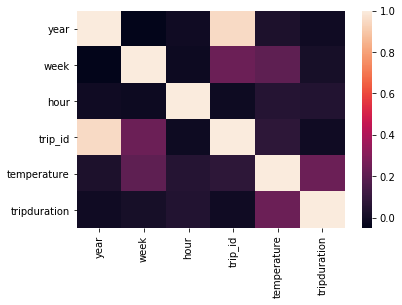

In [110]:
sns.heatmap(df_sample_ghour.corr())

After aggregating by average temperature, we see there is a 0.2 standard correlation between temperature and trip duration. We'll see how that changes depending on our aggregation technique and the different segments in our dataset (users, events, etc.)

In [117]:
df_sample_ghour[['temperature', 'tripduration']].corr()

temperature  tripduration
temperature      1.000000      0.237518
tripduration     0.237518      1.000000

## Average Weekly Temperature vs. Trip Duration 
### Segmented by Gender

In [107]:
fig = px.scatter(df_sample_gweek, x='temperature', y='tripduration', 
                color= 'gender')
fig.show()

Note: This is the trend of temperature versus trip duration grouped by the weekly temperature rating for bike rides. It is easier to see the upward trend between an increased temperature leading to an increased trip duration.

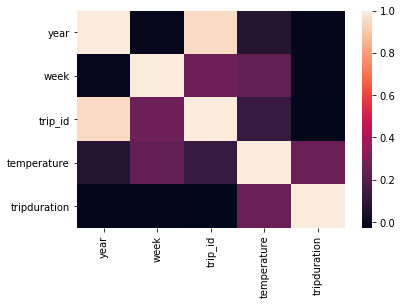

In [111]:
sns.heatmap(df_sample_gweek.corr())

In [116]:
df_sample_gweek[['temperature', 'tripduration']].corr()

temperature  tripduration
temperature      1.000000      0.251479
tripduration     0.251479      1.000000

Note: When we compare the correlation based on an average temperature aggregation by week and by hour, there is a higher correlation between temperature and tripduration (0.251 by week and 0.238 by hour).


# Max Temperature Aggregation per Week, Hour, Year

## Weekly Aggregation

In [119]:
df_sample_gweek_max = df_sample[['year', 'week','trip_id', 'usertype', 'gender', 'events','temperature', 'tripduration']].groupby(['year','week','usertype','gender','events']).max().reset_index()

df_sample_gweek_max.shape

(1358, 8)

In [121]:
fig = px.scatter(df_sample_gweek_max, x='temperature', y='tripduration',
                color = 'gender')
fig.show()

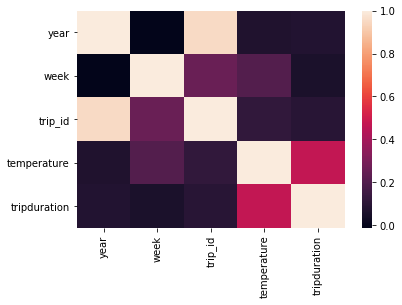

In [127]:
sns.heatmap(df_sample_gweek_max.corr())

In [122]:
df_sample_gweek_max[['temperature', 'tripduration']].corr()

temperature  tripduration
temperature      1.000000      0.469651
tripduration     0.469651      1.000000

Note: With this new aggregation technique, we are seeing an increased correlation between temperature and tripduration based on a weekly time window to 0.470

## Hourly Aggregation 

In [123]:
df_sample_ghour_max = df_sample[['year', 'week','hour','trip_id', 'usertype', 'gender', 'events','temperature', 'tripduration']].groupby(['year','week','hour','usertype','gender','events']).max().reset_index()
df_sample_ghour_max.shape

(11973, 9)

In [124]:
fig = px.scatter(df_sample_ghour_max, x='temperature', y='tripduration', 
                color= 'gender')
fig.show()

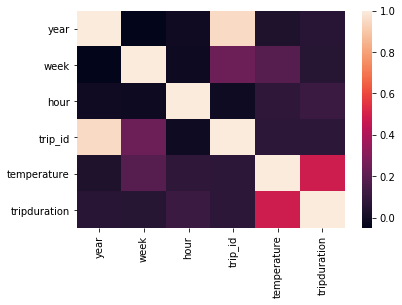

In [128]:
sns.heatmap(df_sample_ghour_max.corr())

In [125]:
df_sample_ghour_max[['temperature', 'tripduration']].corr()

temperature  tripduration
temperature      1.000000      0.480037
tripduration     0.480037      1.000000

Note: With this new aggregation technique, we are seeing an increased correlation between temperature and tripduration based on a hourly time window at 0.4800

Note: The maximum temperature aggregation lead to an increased correlation for hourly time windows when compared to weekly time windows. This is the opposite when we applied an average-based aggregation technique.

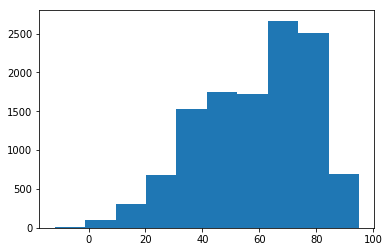

In [132]:
plt.hist(df_sample_ghour_max['temperature']);

In [134]:
df_sample_ghour_max['temperature'].describe()

count    11973.000000
mean        58.486035
std         19.570167
min        -11.900000
25%         44.100000
50%         62.100000
75%         73.900000
max         95.000000
Name: temperature, dtype: float64

#### A few key Notes to Move Forward in our Analysis

(1.) In our sample dataset, for both men and women, an average-based and maximum-value based temperature aggregation technique leads to similar results. Gender has little impact on the total time duration of the riders.

(2.) Our usertypes are predominantly subscribers. In this analysis, we will avoid filtering any results based on usertype due to the low representation of the groups other than subscribers in our sample dataset.

(3.) Most of the events categories are from cloudly days (88%). We will numerically verify the impact of different weather patterns on time_duration and determine, from their distributions, the p-value difference. If it's below a threshold of alpha, (0.05) we could say there is justification to remove it from our analysis.

### Understanding the Impact of Gender, Events, and User Type on Temperature vs. Time Duration

Goal: Statistically verify we can ignore these categories. For the purposes of this analysis, we will justify one time window or another using a two-tailed hypothesis test. 

In [135]:
fig = px.scatter(df_sample_gweek_max, x='temperature', y='tripduration')
fig.show()

In [151]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_sample_gweek_max['temperature'], name = 'Max Temperature Aggregation'))
fig.add_trace(go.Histogram(x=df_sample_gweek['temperature'], name = 'Average Temperature Aggregation'))

# The two histograms are drawn on top of another
fig.update_layout(title = 'Aggregation Comparision between Mean and Max Temperature for a Weekly Time Window',
                 xaxis_title_text='Temperature (Degrees F)')


fig.show()

In [150]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_sample_ghour_max['temperature'], name = 'Max Temperature Aggregation'))
fig.add_trace(go.Histogram(x=df_sample_ghour['temperature'], name = 'Average Temperature Aggregation'))

# The two histograms are drawn on top of another
fig.update_layout(title = 'Aggregation Comparision between Mean and Max Temperature for a Hourly Time Window',
                 xaxis_title_text='Temperature (Degrees F)',)


fig.show()